# Basics of convolutions and the effect of kernels

In [12]:
from PIL import Image
import numpy as np

In [33]:
img = Image.open('img.jpg')
ar = np.array(img) 

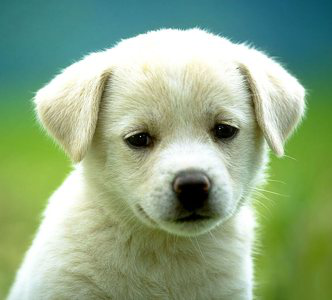

In [34]:
img

### It is a RGB image

In [35]:
ar.shape

(300, 332, 3)

In [36]:
grey = img.convert('L')

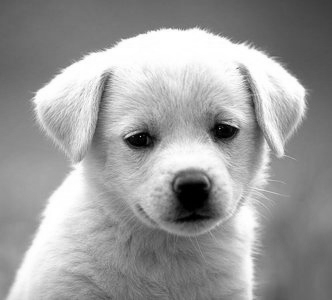

In [37]:
grey

### Converted to black & white

In [38]:
gr = np.array(grey) 
gr.shape

(300, 332)

In [57]:
## Reduce size
grey = grey.resize((180,200), Image.ANTIALIAS)

In [59]:
gr = np.array(grey) 
gr.shape

(200, 180)

## Convolution function:

In image processing, a kernel, convolution matrix, or mask is a small matrix. It is used for blurring, sharpening, embossing, edge detection, and more. This is accomplished by doing a convolution between a kernel and an image.

<img src = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcToK24h9v2wQF0vSRnJmRqnqF0Rd-yNxZEFGgzuo-eV0H8ZfOxy1g' </img>



In [47]:
def convolve2d(image, kernel):    
    kernel = np.flipud(np.fliplr(kernel))   
    output = np.zeros_like(image)            
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))   
    image_padded[1:-1, 1:-1] = image
    for x in range(image.shape[1]):     
        for y in range(image.shape[0]):
            output[y,x]=(kernel*image_padded[y:y+3,x:x+3]).sum()        
    return output

#### Using kernels from : https://en.wikipedia.org/wiki/Kernel_(image_processing)

## Identity matrix as Kernel

In [65]:
kernel = np.array([[1,0,0],[0,1,0],[0,0,1]])
i = convolve2d(gr,kernel)

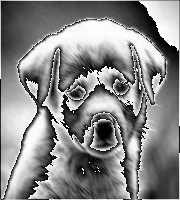

In [66]:
Image.fromarray(i.astype('uint8'))

### The below kernel acts like an identity function

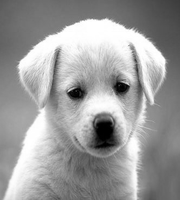

In [67]:
kernel = np.array([[0,0,0],[0,1,0],[0,0,0]])
i = convolve2d(gr,kernel)
Image.fromarray(i.astype('uint8'))

### Edge detection kernels: Horizontal, vertical & both

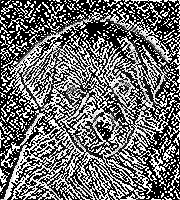

In [68]:
kernel = np.array([[1,0,-1],[0,0,0],[-1,0,1]])
i = convolve2d(gr,kernel)
Image.fromarray(i.astype('uint8'))

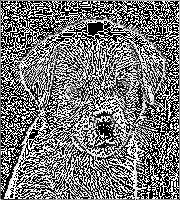

In [69]:
kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]])
i = convolve2d(gr,kernel)
Image.fromarray(i.astype('uint8'))

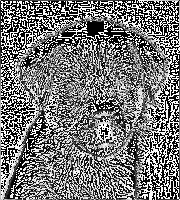

In [70]:
kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
i = convolve2d(gr,kernel)
Image.fromarray(i.astype('uint8'))

### Sharpen image

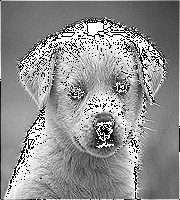

In [71]:
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
i = convolve2d(gr,kernel)
Image.fromarray(i.astype('uint8'))

### Blur the image

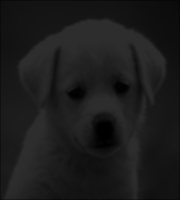

In [75]:
kernel = np.array([[1/50,1/50,1/50],[1/50,1/50,1/50],[1/50,1/50,1/50]])
i = convolve2d(gr,kernel)
Image.fromarray(i.astype('uint8'))

# This is the basic of CNN used for higher Level Object recognition